# PRECTICA 22

* Cargue la base de datos en Python y asegúrese de re-codificar las variables categóricas de manera pertinente antes de iniciar su análisis (Sugerencia: Use “pd.get_dummies”) 

* Use el método de Máquinas de soporte vectorial para generar un modelo predictivo. Para dicho fin, pruebe los 4 diferentes tipos de Kernel discutidos en esta lección. En cada caso elabore un mapa de calor para las matrices de confusión así como un reporte de clasificación detallado. Interprete verbalmente sus indicadores. 
* ¿Cuál resultó ser el modelo predictivo más adecuado? Explique su razonamiento. 
* ¿Qué resultado pronosticaría para un empleado con los siguientes indicadores? 

# 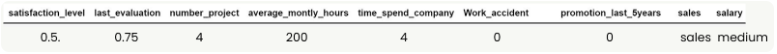

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [148]:
rh_df = pd.read_csv('C:/Users/Isaac/Desktop/IHD/EBAC DT/M22 DS/recursos_humanos.csv')
rh_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [10]:
rh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
pd.unique(rh_df['left'])

array([1, 0], dtype=int64)

In [14]:
dummies_sales = pd.get_dummies(rh_df['sales'], prefix = 'sales')
dummies_sales = dummies_sales.astype(int)
dummies_salary = pd.get_dummies(rh_df['salary'], prefix = 'salary')
dummies_salary = dummies_salary.astype(int)

In [15]:
rh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [16]:
rh_df = pd.concat([rh_df, dummies_sales], axis = 1)
rh_df = pd.concat([rh_df, dummies_salary], axis = 1)
rh_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,...,0,0,0,0,0,1,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,support,low,...,0,0,0,0,0,1,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,...,0,0,0,0,0,1,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,support,low,...,0,0,0,0,0,1,0,0,1,0


In [19]:
rh_df.drop(['sales', 'salary'], axis = 1, inplace = True)

In [100]:
rh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int32  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales_IT               14999 non-null  int32  
 9   sales_RandD            14999 non-null  int32  
 10  sales_accounting       14999 non-null  int32  
 11  sales_hr               14999 non-null  int32  
 12  sales_management       14999 non-null  int32  
 13  sales_marketing        14999 non-null  int32  
 14  sales_product_mng      14999 non-null  int32  
 15  sa

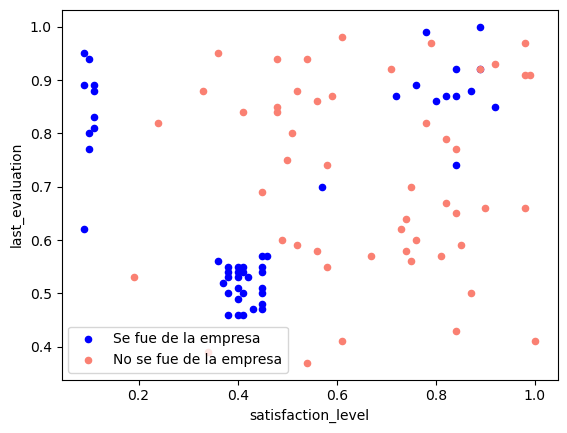

In [31]:
ax = rh_df[rh_df['left']== 1][0:50].plot(kind = 'scatter', x = 'satisfaction_level', y = 'last_evaluation', color= 'blue', label = 'Se fue de la empresa');
ax = rh_df[rh_df['left']== 0][0:50].plot(kind = 'scatter', x = 'satisfaction_level', y = 'last_evaluation', color= 'salmon', label = 'No se fue de la empresa', ax = ax);
plt.show()

In [57]:
# Asignamos valores a nuestras variables 'x' y 'y'

rh1 = rh_df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident',
             'promotion_last_5years','sales_IT','sales_RandD','sales_accounting','sales_hr','sales_management','sales_marketing',
             'sales_product_mng','sales_sales','sales_support','sales_technical','salary_high','salary_low','salary_medium']]
x = np.asarray(rh1)
x

array([[0.38, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.8 , 0.86, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.11, 0.88, 7.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.37, 0.53, 2.  , ..., 0.  , 1.  , 0.  ],
       [0.11, 0.96, 6.  , ..., 0.  , 1.  , 0.  ],
       [0.37, 0.52, 2.  , ..., 0.  , 1.  , 0.  ]])

In [58]:
rh_df['left']= rh_df['left'].astype('int')
y = np.asarray(rh_df['left'])
y[0:5]

array([1, 1, 1, 1, 1])

In [59]:
# normalizamos los datos

#x = (x1 - np.min(x1)) / (np.max(x1) - np.min(x1))
#x

CREAMOS GRUPOS DE ENTRENAMIENTO Y PRUEBAS

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 1)

# revisamos la dimension de las bases

print('Grupo de entrenamiento', X_train.shape, y_train.shape)
print('Grupo de prueba', X_test.shape, y_test.shape)

Grupo de entrenamiento (11999, 20) (11999,)
Grupo de prueba (3000, 20) (3000,)


# Modelo SVM

In [61]:
from sklearn import svm

KERNEL RBF

In [62]:
rbf = svm.SVC(kernel = 'rbf')

# entrenamos el modelo

rbf.fit(X_train, y_train)

SVC()

In [63]:
# realizamos predicciones

rbf_pred = rbf.predict(X_test)
rbf_pred[0:5]

array([0, 0, 0, 0, 0])

In [64]:
# creamos la matriz de confucion

from sklearn.metrics import confusion_matrix

In [70]:
m_cnof = rbf.predict(x)
cm = confusion_matrix(y_test, rbf_pred)
cm

array([[2287,    0],
       [ 663,   50]], dtype=int64)

In [71]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
rbf_pred

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
# visualizamos la MC

import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

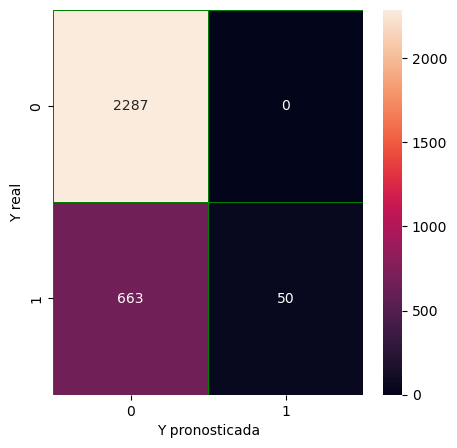

In [74]:
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor= 'green', fmt= '.0f', ax = ax)
plt.xlabel('Y pronosticada')
plt.ylabel('Y real')
plt.show

* Se pronosticaron 2950 casos acertando 2287 y 663 errores 
* Se pronosticaron 50 casos acertando todos los pronosticos

In [75]:
# Revisamos las estadisticas de desempeño

from sklearn.metrics import classification_report

In [77]:
cm_matirx = confusion_matrix(y_test, rbf_pred, labels = [0,1])
print(classification_report(y_test, rbf_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      2287
           1       1.00      0.07      0.13       713

    accuracy                           0.78      3000
   macro avg       0.89      0.54      0.50      3000
weighted avg       0.83      0.78      0.70      3000



# SVM con Kernel Lineal

In [91]:
svm_lineal = svm.SVC(kernel = 'linear')

# entrenamos el algoritmo

svm_lineal.fit(X_train, y_train)

# realizamos predicciones

svm_lineal_pred = svm_lineal.predict(X_test)

# matriz de confusion

from sklearn.metrics import confusion_matrix
m_conf = svm_lineal.predict(x)
cm = confusion_matrix(y_test, svm_lineal_pred)
cm

array([[2121,  166],
       [ 515,  198]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

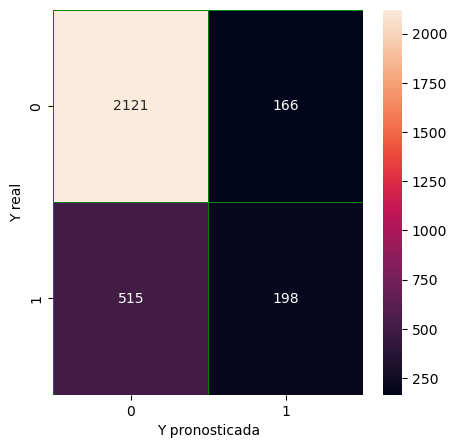

In [92]:
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor= 'green', fmt= '.0f', ax = ax)
plt.xlabel('Y pronosticada')
plt.ylabel('Y real')
plt.show

In [93]:
from sklearn.metrics import classification_report
cm_matrix = confusion_matrix(y_test, svm_lineal_pred, labels = [0,1])
print(classification_report(y_test, svm_lineal_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2287
           1       0.54      0.28      0.37       713

    accuracy                           0.77      3000
   macro avg       0.67      0.60      0.61      3000
weighted avg       0.74      0.77      0.74      3000



# SVM con kernel Polinomial

In [94]:
svm_pll = svm.SVC(kernel = 'poly')

# entrenamos el modelo

svm_pll.fit(X_train, y_train)

# hacemos predicciones

svm_pll_pred = svm_pll.predict(X_test)

# matriz de confusion

from sklearn.metrics import confusion_matrix

cm_matrix = svm_pll.predict(x)
cm = confusion_matrix(y_test, svm_pll_pred)
cm

array([[2287,    0],
       [ 713,    0]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

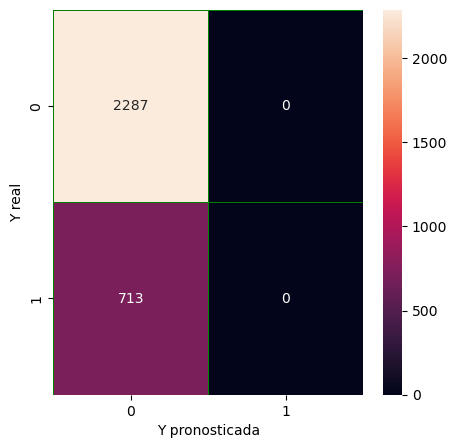

In [95]:
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor= 'green', fmt= '.0f', ax = ax)
plt.xlabel('Y pronosticada')
plt.ylabel('Y real')
plt.show

In [96]:
from sklearn.metrics import classification_report

cm_matrix = confusion_matrix(y_test, svm_pll_pred, labels = [0,1])
print(classification_report(y_test, svm_pll_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87      2287
           1       0.00      0.00      0.00       713

    accuracy                           0.76      3000
   macro avg       0.38      0.50      0.43      3000
weighted avg       0.58      0.76      0.66      3000



# SVM con kernel Sigmoide

In [97]:
svm_sig = svm.SVC(kernel = 'sigmoid')

# entrenamos el algoritmo

svm_sig.fit(X_train, y_train)

# hacemos predicciones

svm_sig_pred = svm_sig.predict(X_test)

# matriz de confusion

from sklearn.metrics import confusion_matrix
cm_matrix = svm_sig.predict(x)
cm = confusion_matrix(y_test, svm_sig_pred)
cm

array([[1822,  465],
       [ 495,  218]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

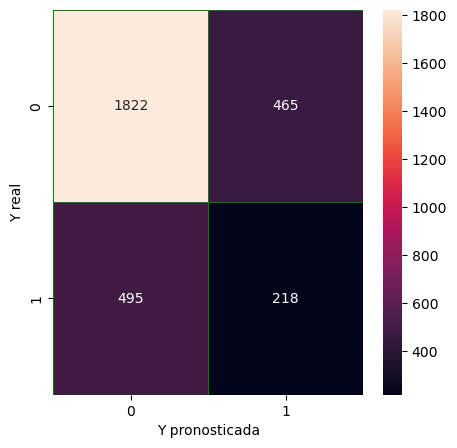

In [98]:
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor= 'green', fmt= '.0f', ax = ax)
plt.xlabel('Y pronosticada')
plt.ylabel('Y real')
plt.show

In [99]:
from sklearn.metrics import classification_report
cm_matrix = confusion_matrix(y_test, svm_sig_pred, labels = [0,1])
print(classification_report(y_test, svm_sig_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      2287
           1       0.32      0.31      0.31       713

    accuracy                           0.68      3000
   macro avg       0.55      0.55      0.55      3000
weighted avg       0.68      0.68      0.68      3000



# ¿Cuál resultó ser el modelo predictivo más adecuado?

* RBF

   precision    recall  f1-score   support

           0       0.78      1.00      0.87      2287
           1       1.00      0.07      0.13       713
Revisando los resultados de los reportes de clasificacion de cada modelo, el mas optimo en esta caso es el modelo de RBF.

Los otros 3 modelos sus predicciones no fueron tan acertivas lo que se reflejaba en los reportes donde indicaban valores cercanos a 0, recordando que un valor cercano a 0 o igual a 0 es un nodelo No confiable.

¿Qué resultado pronosticaría para un empleado con los siguientes indicadores? 
# 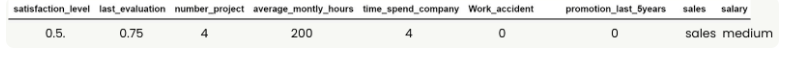

In [127]:
rh_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


PREDICCION CON VALORES ESPECIFICOS.
¿ SE VA O SE QUEDA EL EMPLEADO?

In [129]:
# cREAMOS UN NUEVO DF CON LOS VALORES INDICADOS
empleado_pronos = pd.DataFrame({'satisfaction_level': [0.5], 
                             'last_evaluation': [0.75],      
                             'number_project':[4],
                             'average_montly_hours':[200],
                             'time_spend_company':[4],
                             'Work_accident':[0],
                             'left':[1],
                             'promotion_last_5years':[0],
                             'sales_IT':[0],
                             'sales_RandD':[1],
                             'sales_accounting':[0],
                             'sales_hr':[0],
                             'sales_management':[1],
                             'sales_marketing':[1],
                             'sales_product_mng':[0],
                             'sales_sales':[1],
                             'sales_support':[1],
                             'sales_technical':[0],
                             'salary_high':[0],
                             'salary_low':[1],
                             'salary_medium':[1]})


# x_prono= np.asarray(employe_pron)
empleado_pronos

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.5,0.75,4,200,4,0,1,0,0,1,...,0,1,1,0,1,1,0,0,1,1


In [134]:
ampleado_pronos = empleado_pronos.drop('left', axis = 1, inplace = True)

In [147]:
rbf.fit(X_train, y_train)
prediccion = rbf.predict(empleado_pronos)
prediccion

array([0])

* USANDO EL MODELO RBF(EL QUE MEJORES RESULTADOS ARROJO) Y SUANDO LOS VALORES ESPECIFICOS, LA PREDICCION DEL MODELO ES 0 LO QUE INDICA QUE EL EMPLEADO SE QUEDA EN EL TRABAJO.